In [ ]:
import numpy as np
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import models, layers
import matplotlib.pyplot as plt
from keras.models import load_model

data = arff.loadarff('../datasets/Training Dataset.arff')
df = pd.DataFrame(data[0]).astype('int')
df = df[['URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
         'Domain_registeration_length', 'Abnormal_URL', 'age_of_domain', 'URL_of_Anchor', 'SFH',
         'Submitting_to_email', 'Result']]
X = df.values[:, :-1]
df['one_hot_1'] = df['Result'].apply(lambda x: 1 if x == -1 else 0)
df['one_hot_2'] = df['one_hot_1'].apply((lambda x: 1 - x))
y = df.values[:, -2:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5331)

Epoch 1/25
14/14 [==============================] - 1s 27ms/step - loss: 0.6194 - accuracy: 0.6759 - val_loss: 0.5794 - val_accuracy: 0.7451
Epoch 2/25
14/14 [==============================] - 0s 15ms/step - loss: 0.5529 - accuracy: 0.7625 - val_loss: 0.5176 - val_accuracy: 0.7835
Epoch 3/25
14/14 [==============================] - 0s 6ms/step - loss: 0.4976 - accuracy: 0.7874 - val_loss: 0.4664 - val_accuracy: 0.7880
Epoch 4/25
14/14 [==============================] - 0s 8ms/step - loss: 0.4525 - accuracy: 0.8054 - val_loss: 0.4237 - val_accuracy: 0.8151
Epoch 5/25
14/14 [==============================] - 0s 7ms/step - loss: 0.4155 - accuracy: 0.8216 - val_loss: 0.3914 - val_accuracy: 0.8338
Epoch 6/25
14/14 [==============================] - 0s 6ms/step - loss: 0.3884 - accuracy: 0.8321 - val_loss: 0.3675 - val_accuracy: 0.8474
Epoch 7/25
14/14 [==============================] - 0s 8ms/step - loss: 0.3675 - accuracy: 0.8428 - val_loss: 0.3509 - val_accuracy: 0.8547
Epoch 8/25
14/14 [

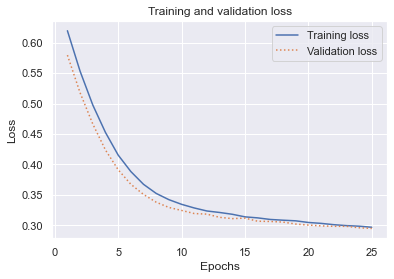

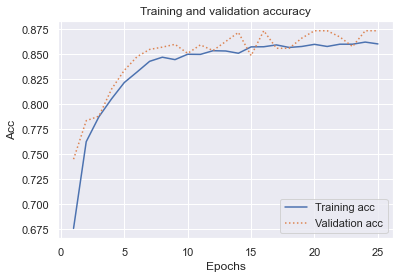

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[['accuracy']])

history = model.fit(X_train, y_train, epochs=25, batch_size=512, validation_split=0.2)
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, '-', label='Training loss')
plt.plot(epochs, val_loss_values, ':', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, '-', label='Training acc')
plt.plot(epochs, val_acc_values, ':', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()



AUC :  0.8528853086696004


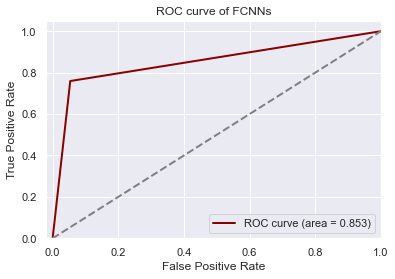

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred = model.predict(X_test)
y_test_roc = [np.argmin(y) for y in y_test]
y_pred_roc = [np.argmin(y) for y in y_pred]
fpr, tpr, thresholds_keras = roc_curve(y_test_roc, y_pred_roc)
auc = auc(fpr, tpr)
print("AUC : ", auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of FCNNs')
plt.legend(loc="lower right")
plt.show()
##################################################


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

Text(89.133125, 0.5, 'Actual label')

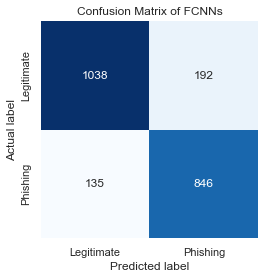

In [ ]:
import seaborn as sns
sns.set()
mat = confusion_matrix(y_test_roc, y_pred_roc)
labels = ['Legitimate', 'Phishing']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix of FCNNs") 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
print("Precision:", precision_score(y_test_roc, y_pred_roc))
print("Recall:",recall_score(y_test_roc, y_pred_roc))
print("F1-Score:", f1_score(y_test_roc, y_pred_roc))

Precision: 0.815028901734104
Recall: 0.8623853211009175
F1-Score: 0.8380386329866271
